# Term0 Week2 授業前課題1 
## コーディング課題：データセット準備、ラベル付け

## 1. 統計基礎用語の説明
### 標準偏差について、分散との違いや関係性、どんな時に使う指標なのか
偏差を2乗することで符号を消し、それらの平均を求めたものを分散という。（標本）分散は$S^2$という記号で表され、  
 $$S^2 = \frac{1}{n}\{(x_1-\overline{x})^2+(x_2-\overline{x})^2+\cdots+(x_n-\overline{x})^2\}$$
と定義される。分散の平方根をとったSを用い、
$$S=\sqrt{S^2}=\sqrt{\frac{1}{n}\{(x_1-\overline{x})^2+(x_2-\overline{x})^2+\cdots+(x_n-\overline{x})^2\}}$$
と表されるものを標準偏差という。  
分散も標準偏差もデータ分布の散らばりを示す指標である。  
分散では符号の効果を排除するために偏差を2乗しており、長さの2乗（例：$m^2$ ）の単位を持つ。  
通常、データの散らばりを評価する際には、同じ次元で評価する方が直感的に分かりやすいので、分散の平方根である標準偏差が用いられる。  
しかし、数学的な記述をする場合は、平方根をとった（2乗した）分散を用いて式展開することが圧倒的に多い。

### 共分散行列について
データが$(x_1, y_1), (x_2, y_2), \cdots, (x_n, y_n)$で与えられたとき、変数$x, y$の間の相関係数は、  
$$r_{xy}=\frac{\sum(x_i-\overline{x})(y_i-\overline{y})/n}{\sqrt{\sum(x_i-\overline{x})^2/n}\sqrt{\sum(y_i-\overline{y})^2/n}}=\frac{S_{xy}}{S_xS_y}$$
で定義される。上記の$S_{xy}$を共分散という。  
分散共分散行列とは、確率変数を多次元に拡張した場合の分散をベクトルの要素間でとり、それらを行列にまとめたものである。  
n個の確率変数$X_1, X_2, \cdots, X_n$に対し、$X_i, X_j (i, j \in \{1, \cdots, n\})$の共分散を$S_{i, j}$とすると、共分散行列は以下の式で定義される。
$$\sum =
\begin{pmatrix}
S_{1,1} & S_{1,2} & \cdots & S_{1,n} \\
S_{2,1} & S_{2,2} & \cdots & S_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
S_{n,1} & S_{n,2} & \cdots & S_{n,n}
\end{pmatrix}$$
ちなみに$S_{1,1}, S_{2,2}, \cdots, S_{n,n}$はその変数自身の分散を表している。  
共分散行列は、データの散らばり具合を多変数に拡張してまとめたものであり、特に2次元正規分布の推定の際に共分散行列の固有値・固有ベクトルを求めることで分布の概観が把握できる利点がある。

### 1次元の正規分布と多次元の正規分布について、特にどういう時に使うのか
1次元の正規分布は、平均$\mu$、分散$\sigma^2$とすると、下記の式で定義される。
$$f(x)=\frac{1}{\sqrt{2\pi}\sigma}exp\{-(x-\mu)^2/2\sigma^2\},　-\infty<x<+\infty$$
正規分布はガウス分布とも呼ばれ、本分布に従うとされる例は非常に多い（身長やテスト点数などの分布）。  
多次元の正規分布とは、各確率変数を独立と考えるのではなく、多数の確率変数が関連し合うことを最初から受容して用いられる確率分布のこと。  
2次元正規分布を考える際、共分散行列の対角項は各変数の分散、非対角項はお互いの共分散を表す。また、2次元正規分布の分散最大（小）化方向を「長（短）軸」とすると、共分散行列の固有値は元の２つの変数軸から長（短）軸への拡大率を、固有ベクトルは長（短）軸の方向を示している。2変数の共分散行列を指定することで、2次元正規分布における固有値、固有ベクトルの算出へと繋がり、主成分分析等への応用へと発展していく。

## 2. データ点の作成  
2次元正規分布を用いて、中心(平均)が(-3,0)と(0,-3)、共分散行列が以下で表現される確率分布から生成されるデータ点を500個ずつ作成。  
その際、片方の500個のデータにはdata1、もう片方の500個のデータにはdata2と名付けて作成。  
  

$$
\begin{pmatrix}
1.0 & 0.8 \\
0.8 & 1.0 \\
\end{pmatrix}
$$


In [2]:
import numpy as np

#平均
mu1 = [-3, 0]
mu2 = [0, -3]
#共分散
cov = [[1.0, 0.8], [0.8, 1.0]]

#データ数：500
data1 = np.random.multivariate_normal(mu1,cov,500)
data2 = np.random.multivariate_normal(mu2,cov,500)

## 3. データ点へのラベル付け
上で作成した500個×2のデータに対してラベル付け（ここでは簡単に0と1とする。）

- ２つの確率分布からサンプリングされたデータ(numpy配列)をnp.concatenateを用いて結合する。  
- 結合した行列の上から500番目まではを割り振り、501番目~1000番目に0を割り振る。  
- 割り振る際は、結合した配列の３列目にラベルの列を追加する。  
- 1、2列目にはすでに、各データのx座標とy座標が格納されている。


In [3]:
# 各データ長でラベル作成
label1 = np.zeros((data1.shape[0], 1))
label2 = np.ones((data2.shape[0], 1))

# データとラベルをそれぞれ結合
data = np.concatenate([data1, data2])
label = np.concatenate([label1, label2])

# 結合したデータと結合したラベルをさらに結合（3列目にラベル）
data_label = np.concatenate([data,label], axis=1)

## 4. 正しくラベル付けされているか見てみる

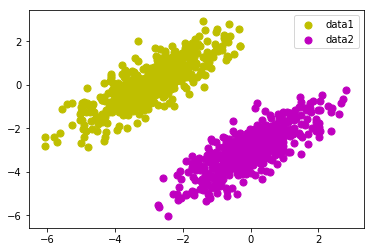

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# 3列目でラベル付けされたデータをそれぞれ抽出し、1列目をX軸、2列目をY軸でプロット
plt.scatter(data_label[data_label[:, 2]==0, 0], 
            data_label[data_label[:, 2]==0, 1], 
            s=50, c="y", marker='o', label="data1")
plt.scatter(data_label[data_label[:, 2]==1, 0], 
            data_label[data_label[:, 2]==1, 1], 
            s=50, c="m", marker='o', label="data2")
plt.legend(loc="best")
plt.show()